In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

df_master = pd.read_csv('skewed_data.csv')
df_master.head()

X = np.array(df_master[['0','1']])
Y = df_master[['target']]

print "X Shape: " + str(X.shape),"Y Shape: " + str(Y.shape)

X Shape: (500, 2) Y Shape: (500, 1)


In [251]:
def class_contour(X):
    ''' function that returns arrays of the countour of the decision boundary of class 0 '''    
    xlim = (X[:,0].min()*1.25,X[:,0].max()*1.25)
    ylim = (X[:,1].min()*1.25,X[:,1].max()*1.25)

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                        np.linspace(ylim[0], ylim[1], 50))
    Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)

    #fig = plt.figure()
    #plt.scatter(X_test[:,0],X_test[:,1])
    #sns.kdeplot(Z[:,0],Z[:,1])
    #plt.contour(xx,yy,Z)
    return xx,yy,Z

def find_wrong_pred(X_test, Y_test):
    '''function that returns the X matrix of mis-classified observations'''    
    Y_comp = np.matrix([Y_test,clf.predict(X_test)]).T
    wrong_array = []
    for entry in range(len(Y_test)):
        obs = np.ravel(Y_comp[entry])
        #print obs[0],obs[1]
        if obs[0] != obs[1]:
            #print 'Wrong!: %i'%entry
            wrong_array.append(entry)
        else:
            continue
    X_out = X_test[wrong_array,:]
    return X_out

In [221]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Unnamed: 0    500 non-null int64
0             500 non-null float64
1             500 non-null float64
target        500 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.7 KB


In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= 40)
X_train, X_test, Y_train, Y_test = pd.DataFrame(X_train), pd.DataFrame(X_test), pd.DataFrame(Y_train), pd.DataFrame(Y_test)

print X_train.shape
print Y_train.shape

(350, 2)
(350, 1)


Text(0.5,1,'Training Set Visualization')

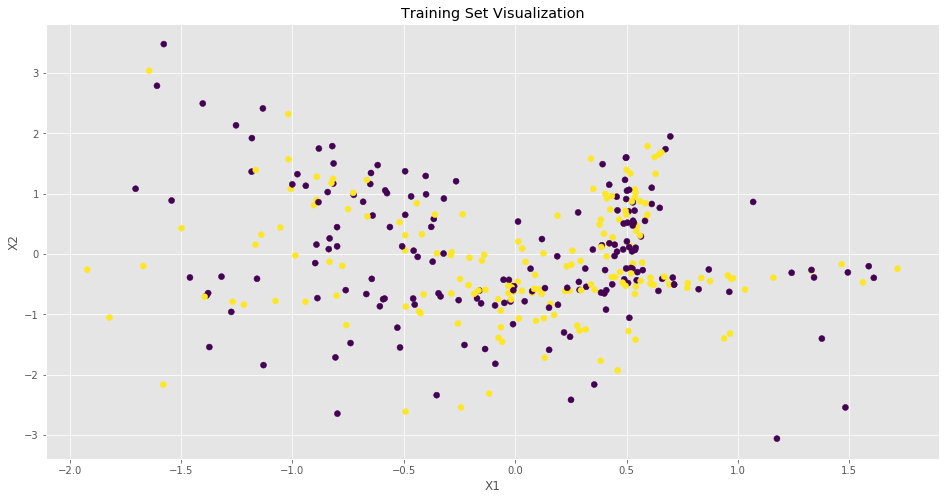

In [223]:
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(111)
plt.scatter(x=X_train.iloc[:,0],y=X_train.iloc[:,1],c=Y_train.iloc[:,0])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Set Visualization')

In [224]:
clf = GaussianNB()
clf.fit(X_train,np.array(Y_train))

print 'Naive Bayes Accuracy: %s'%clf.score(X_test, Y_test)

Naive Bayes Accuracy: 0.54


Text(0.5,1,'Predicted')

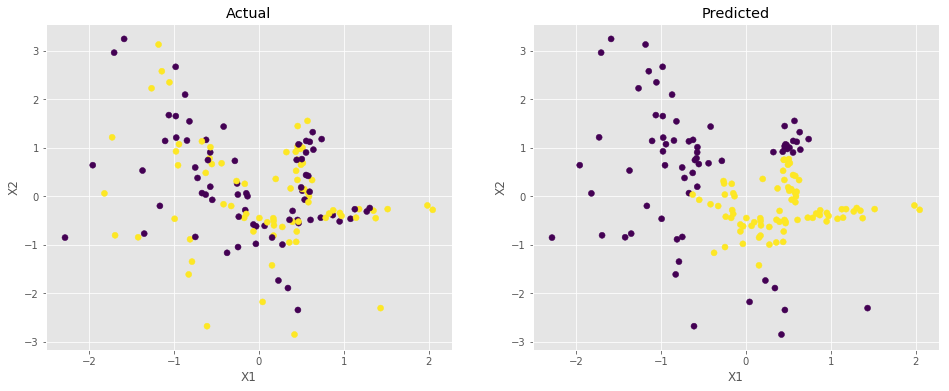

In [225]:
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
plt.scatter(x=X_test.iloc[:,0],y=X_test.iloc[:,1],c=Y_test.iloc[:,0], label='Actual')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual')
plt.subplot(122)
plt.scatter(x=X_test.iloc[:,0],y=X_test.iloc[:,1], c=clf.predict(X_test))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted')

# Clustered


Class Separation: 0.000000
Naive Bayes Test Accuracy: 0.6133333333333333
Naive Bayes Score: 0.6133333333333333
Naive Params: {'priors': None}

Class Separation: 0.555556
Naive Bayes Test Accuracy: 0.6933333333333334
Naive Bayes Score: 0.6933333333333334
Naive Params: {'priors': None}

Class Separation: 1.111111
Naive Bayes Test Accuracy: 0.9333333333333333
Naive Bayes Score: 0.9333333333333333
Naive Params: {'priors': None}

Class Separation: 1.666667
Naive Bayes Test Accuracy: 0.98
Naive Bayes Score: 0.98
Naive Params: {'priors': None}

Class Separation: 2.222222
Naive Bayes Test Accuracy: 1.0
Naive Bayes Score: 1.0
Naive Params: {'priors': None}

Class Separation: 2.777778
Naive Bayes Test Accuracy: 1.0
Naive Bayes Score: 1.0
Naive Params: {'priors': None}

Class Separation: 3.333333
Naive Bayes Test Accuracy: 1.0
Naive Bayes Score: 1.0
Naive Params: {'priors': None}

Class Separation: 3.888889
Naive Bayes Test Accuracy: 1.0
Naive Bayes Score: 1.0
Naive Params: {'priors': None}

Cla

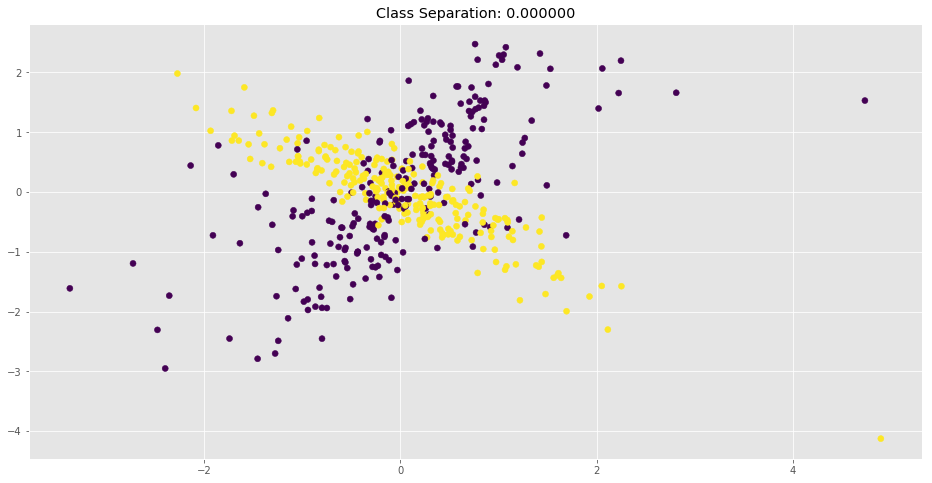

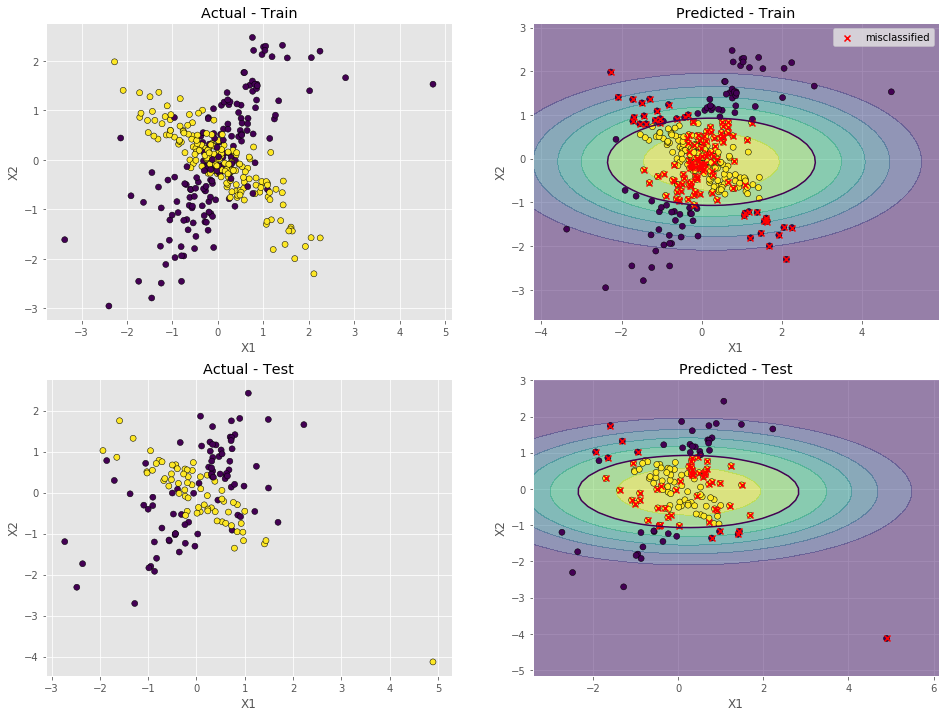

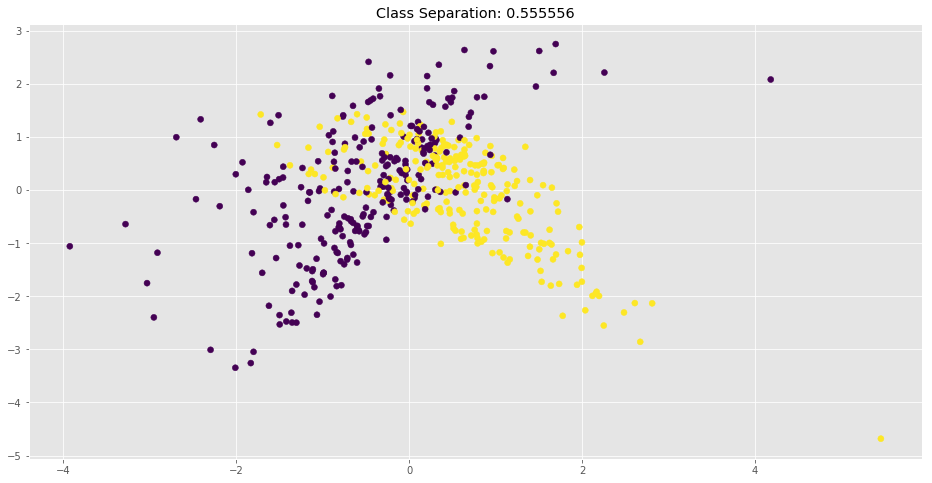

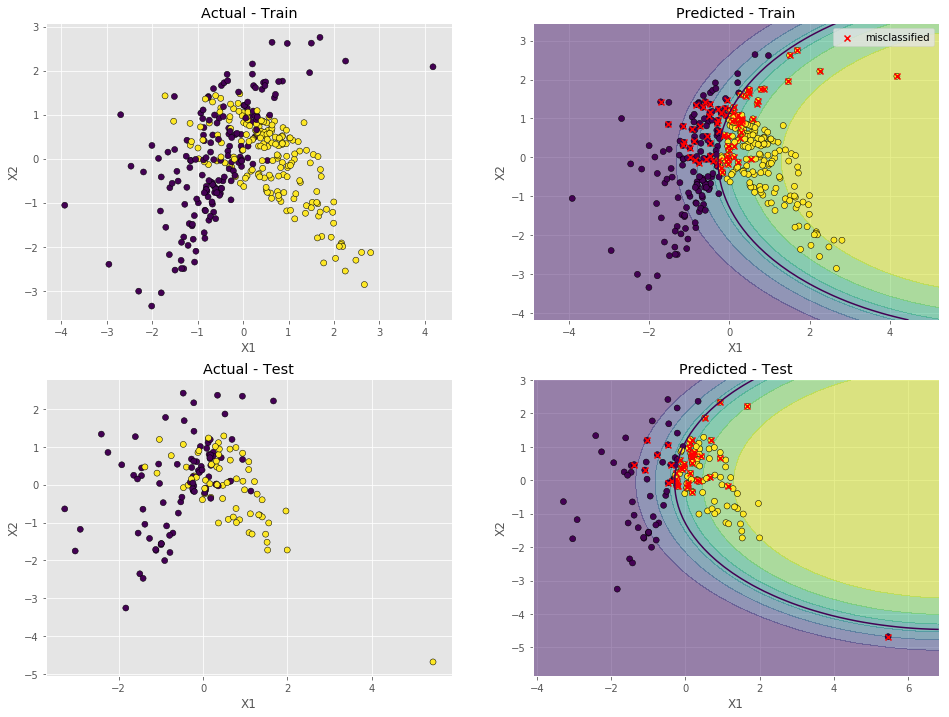

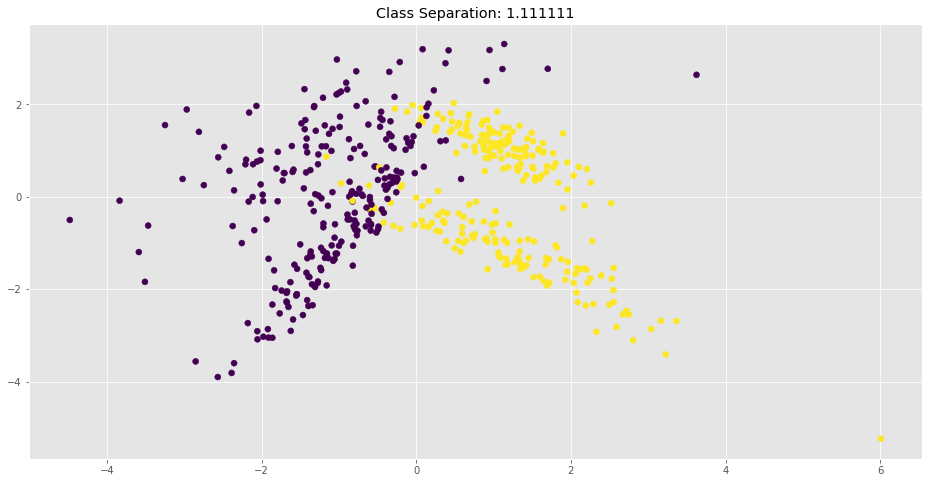

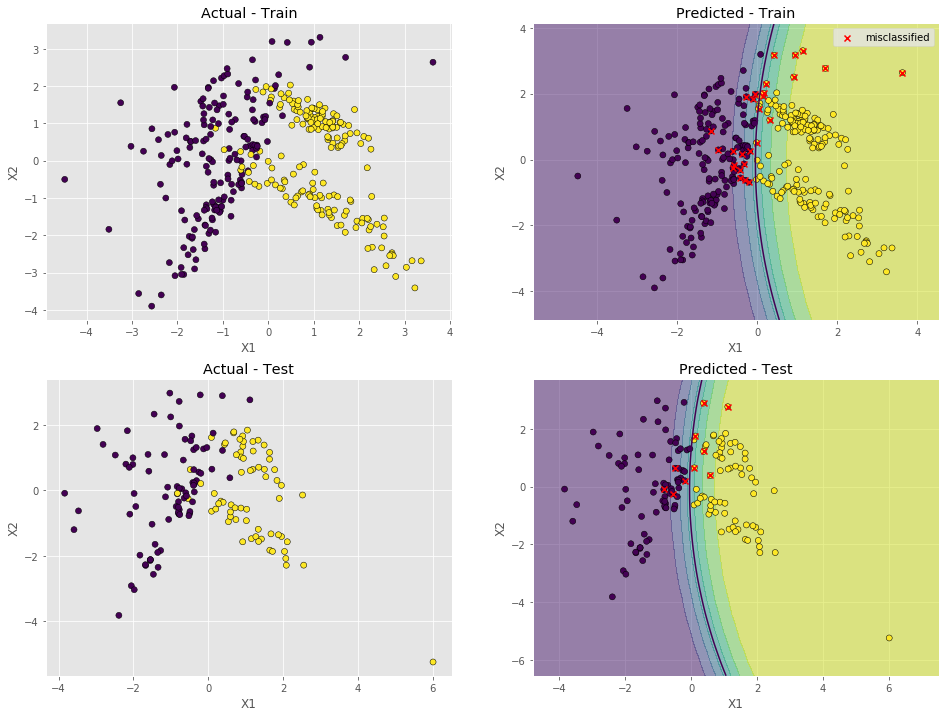

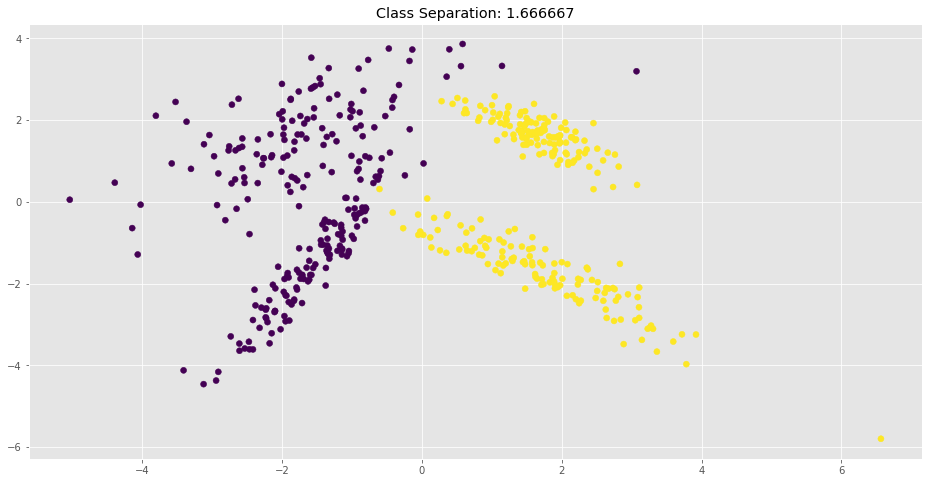

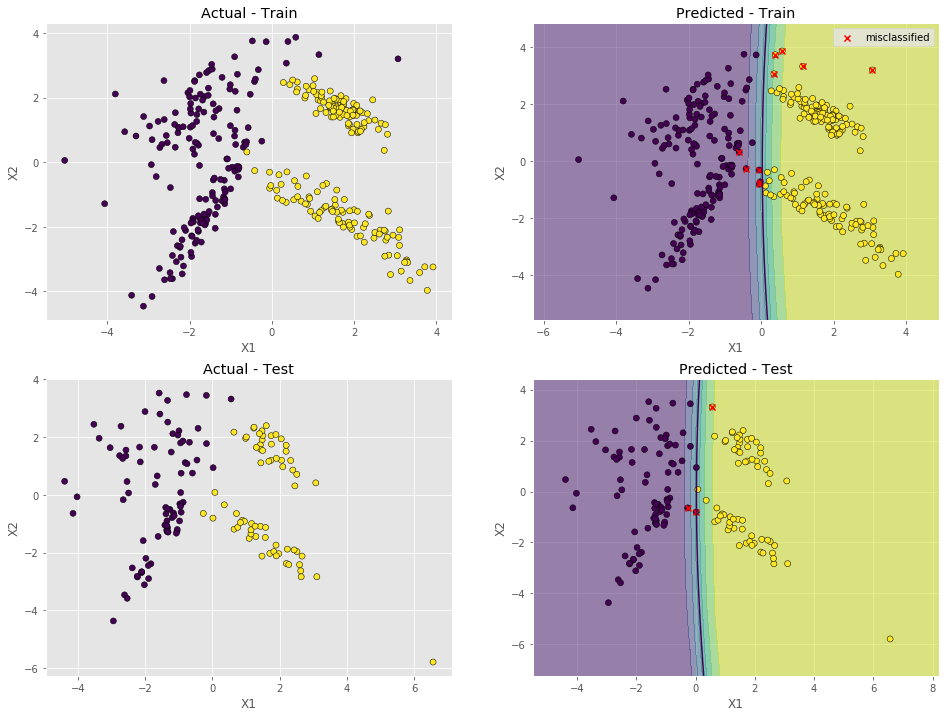

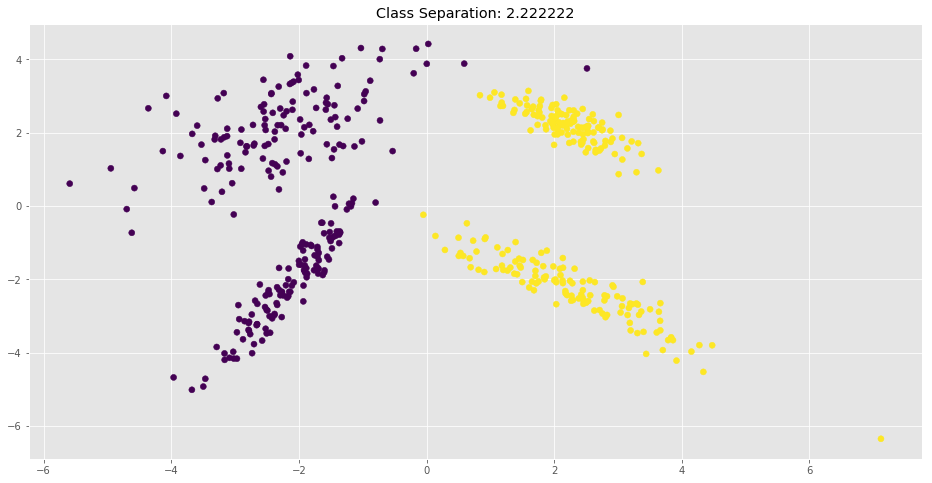

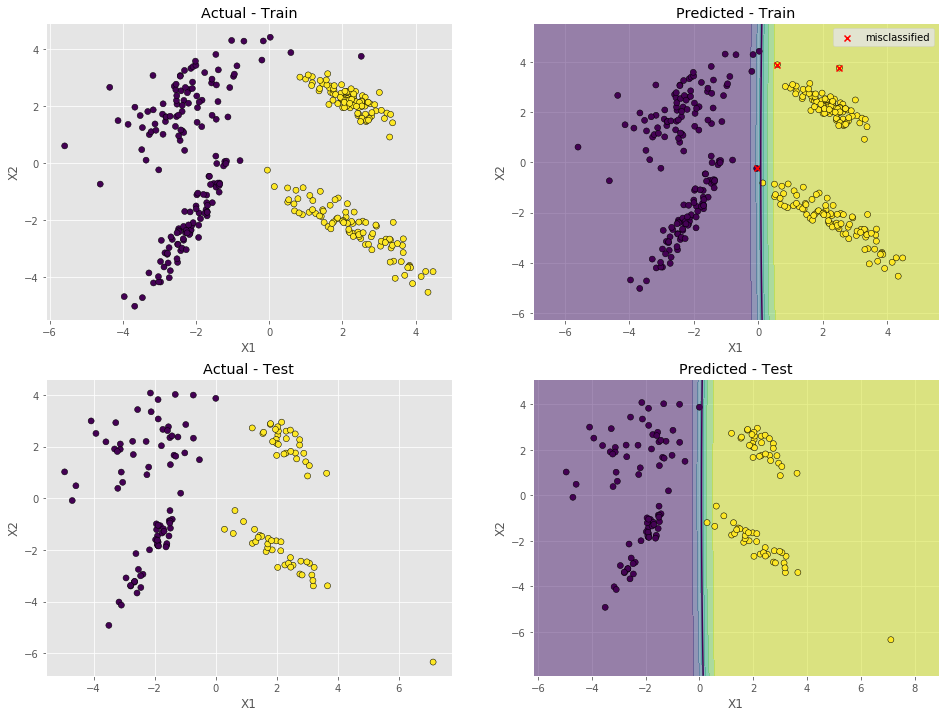

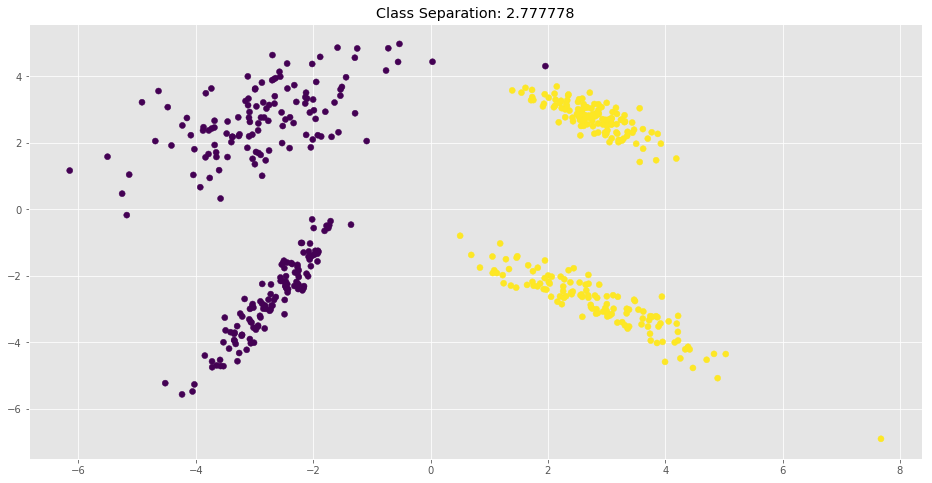

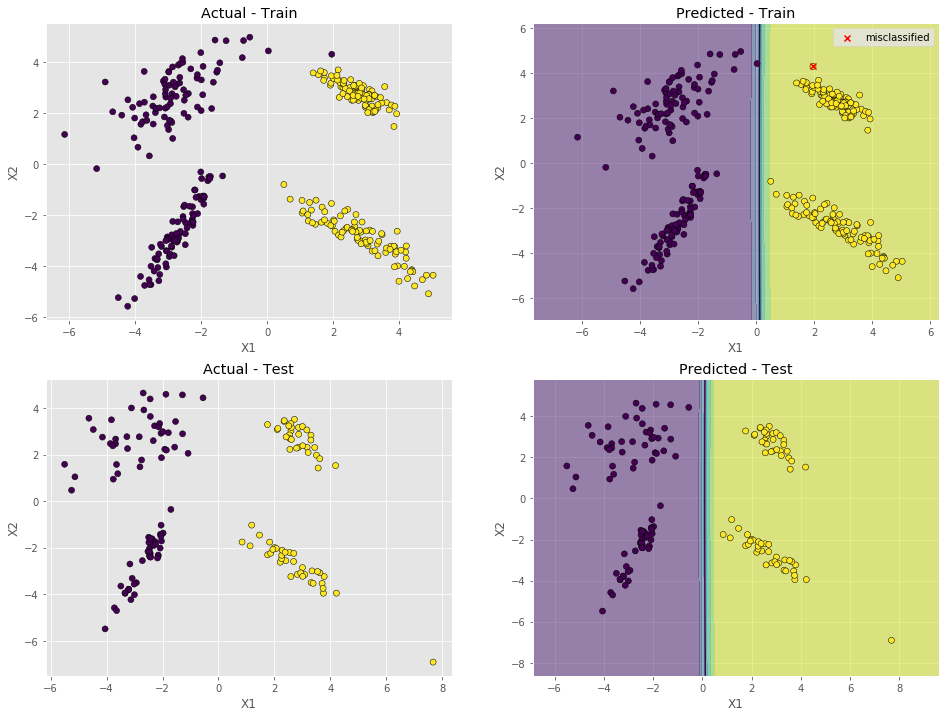

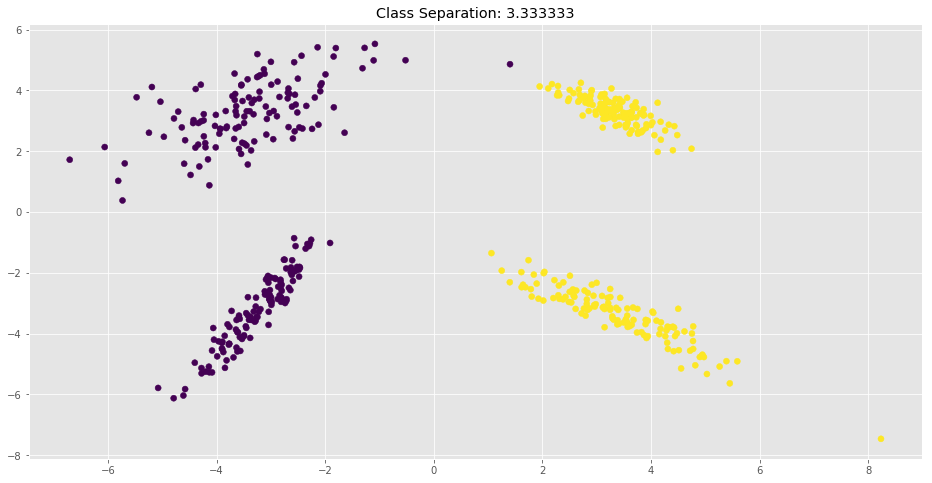

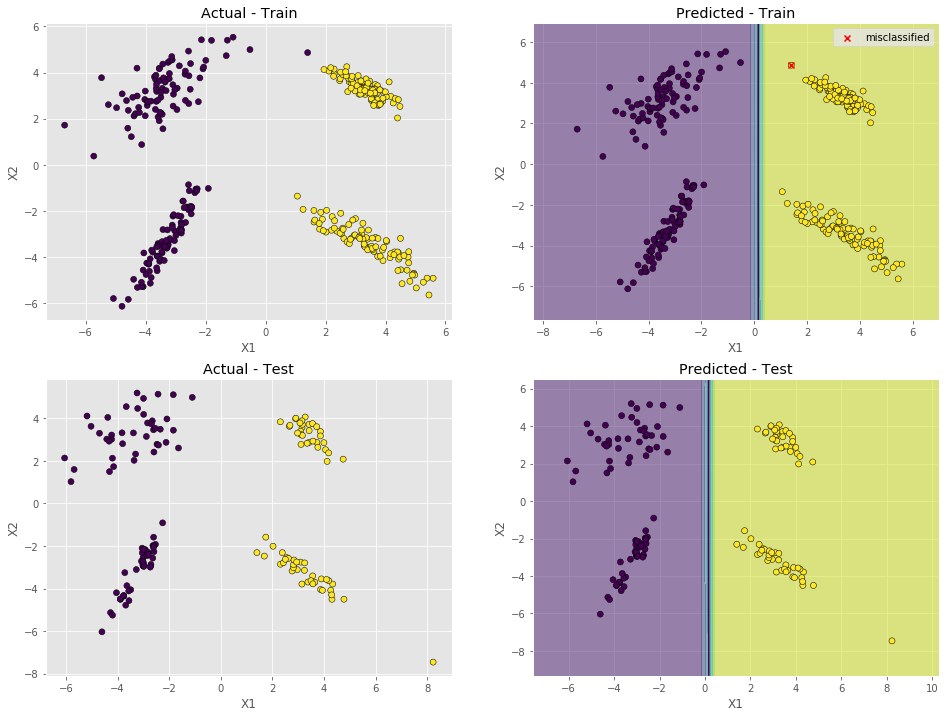

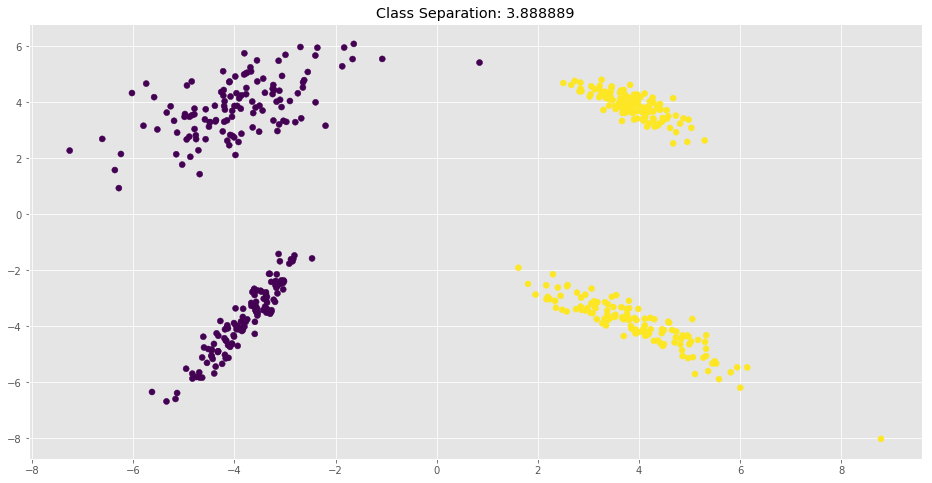

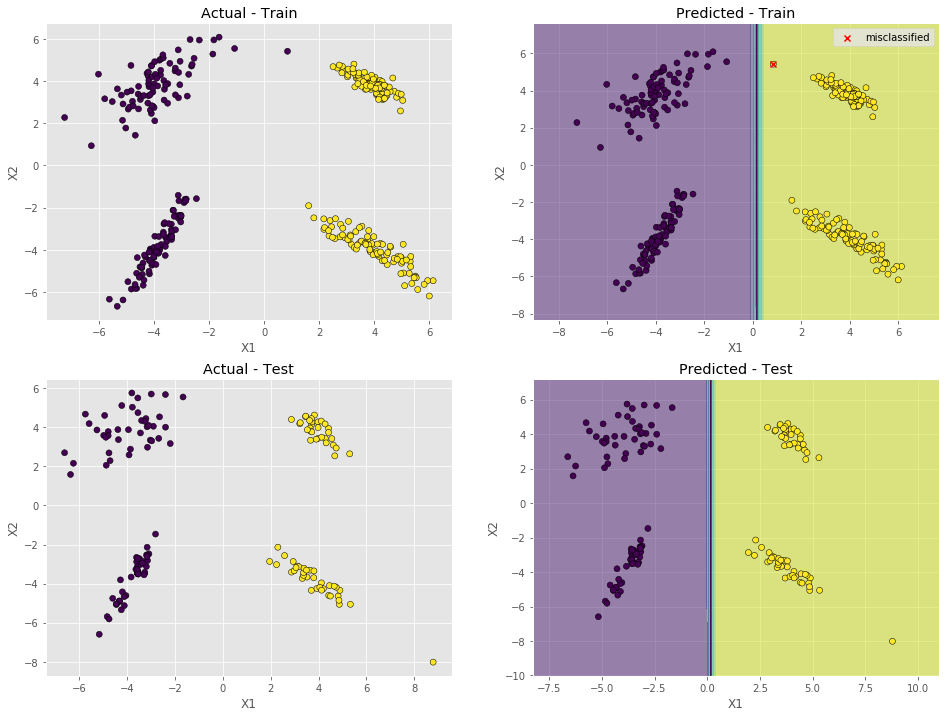

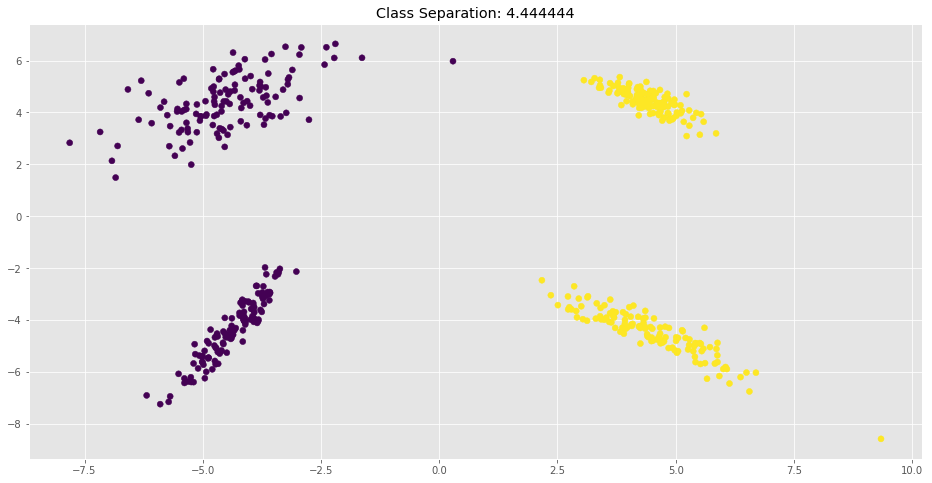

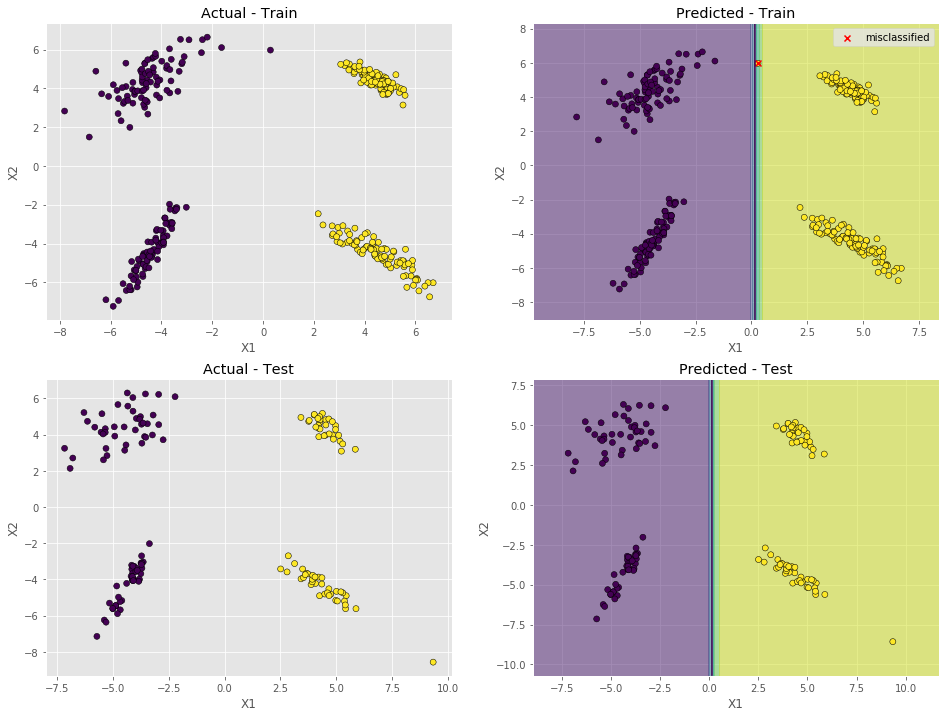

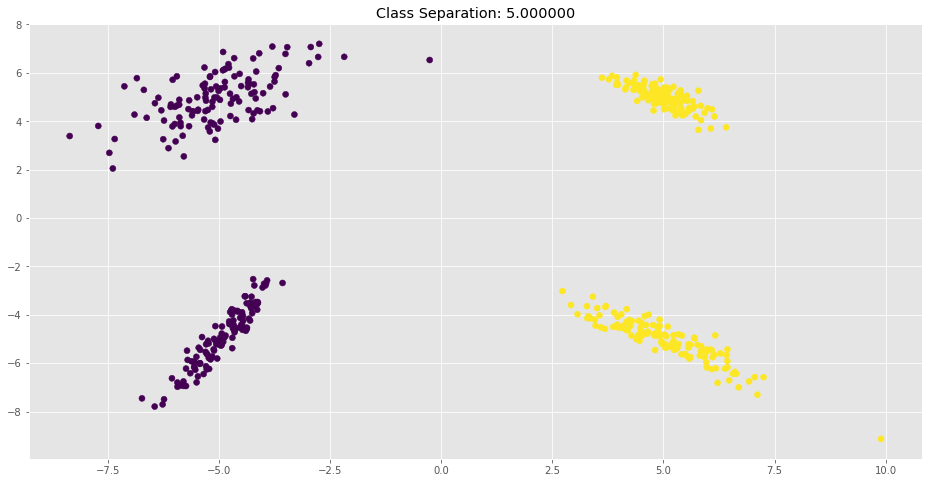

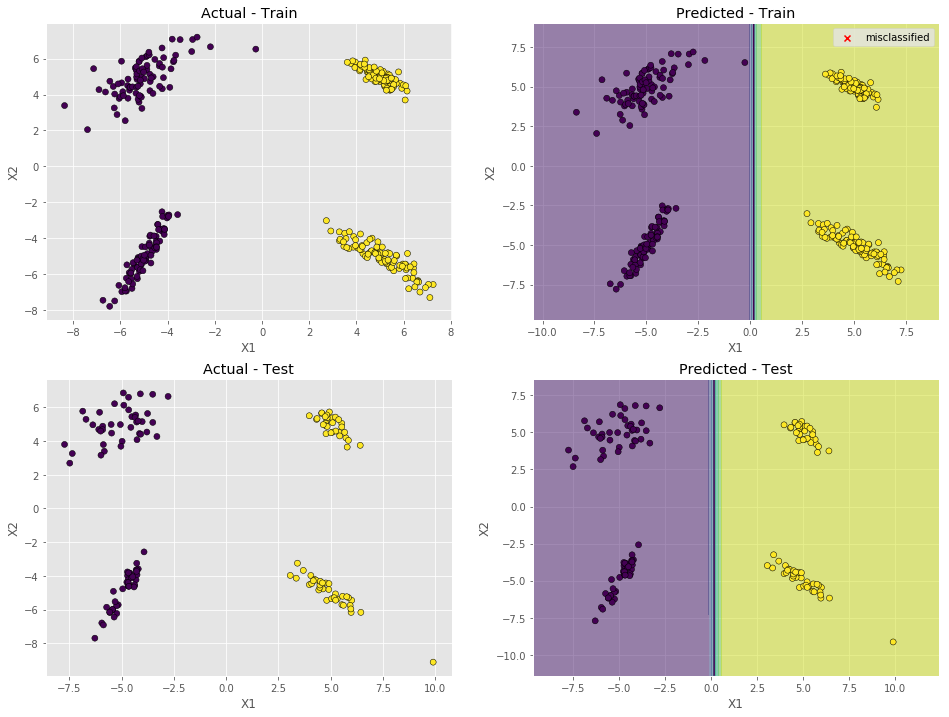

In [278]:
for i in np.linspace(0,5,10):
    np.random.seed(100)
    ''' clustered data '''
    X, y = sklearn.datasets.make_classification(n_samples=500,n_features = 2, n_informative = 2, 
                                                     n_redundant = 0,n_classes = 2,n_clusters_per_class = 2,
                                                         class_sep = i,flip_y=.0,)

    fig = plt.figure(figsize=(16,8))
    ax = plt.subplot(111)
    plt.title('Class Separation: %f'%i)
    plt.scatter(x=X[:,0],y=X[:,1],c=y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state= 40)

    '''print X_train.shape
    print Y_train.shape'''

    clf = GaussianNB()
    clf.fit(X_train,np.array(Y_train))

    print '\nClass Separation: %f'%i
    print 'Naive Bayes Test Accuracy: %s'%clf.score(X_test, Y_test)
    print 'Naive Bayes Score: %s'%clf.score(X_test,Y_test)
    print 'Naive Params: %s'%clf.get_params(deep=True)

    X_wrongTrain = find_wrong_pred(X_train,Y_train)
    X_wrongTest = find_wrong_pred(X_test,Y_test)
    
    xx,yy,z = class_contour(X_train)
    fig = plt.figure(figsize=(16,12))
    ax = plt.subplot(221)
    plt.scatter(x=X_train[:,0],y=X_train[:,1],c=Y_train, label='Actual',edgecolors='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Actual - Train')
    plt.subplot(222)
    plt.contourf(xx,yy,z,alpha=0.5)
    plt.scatter(x=X_train[:,0],y=X_train[:,1], c=clf.predict(X_train),edgecolors='black')
    plt.scatter(x=X_wrongTrain[:,0],y=X_wrongTrain[:,1],c='red', marker='x',label='misclassified')
    plt.contour(xx,yy,z,[.5])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Predicted - Train')
    plt.legend()

    xx,yy,z = class_contour(X_test)
    ax = plt.subplot(223)
    plt.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_test, label='Actual',edgecolors='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Actual - Test')
    plt.subplot(224)
    plt.contourf(xx,yy,z,alpha=0.5)
    plt.scatter(x=X_test[:,0],y=X_test[:,1], c=clf.predict(X_test),edgecolors='black')
    plt.scatter(x=X_wrongTest[:,0],y=X_wrongTest[:,1],c='red', marker= 'x', label='misclassified')
    plt.contour(xx,yy,z,[.5],)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Predicted - Test')

In [227]:

    
class_contour(X_train)

(array([[-2.40069091, -2.30792736, -2.2151638 , ...,  1.95919618,
          2.05195973,  2.14472329],
        [-2.40069091, -2.30792736, -2.2151638 , ...,  1.95919618,
          2.05195973,  2.14472329],
        [-2.40069091, -2.30792736, -2.2151638 , ...,  1.95919618,
          2.05195973,  2.14472329],
        ...,
        [-2.40069091, -2.30792736, -2.2151638 , ...,  1.95919618,
          2.05195973,  2.14472329],
        [-2.40069091, -2.30792736, -2.2151638 , ...,  1.95919618,
          2.05195973,  2.14472329],
        [-2.40069091, -2.30792736, -2.2151638 , ...,  1.95919618,
          2.05195973,  2.14472329]]),
 array([[-3.82822603, -3.82822603, -3.82822603, ..., -3.82822603,
         -3.82822603, -3.82822603],
        [-3.66132475, -3.66132475, -3.66132475, ..., -3.66132475,
         -3.66132475, -3.66132475],
        [-3.49442346, -3.49442346, -3.49442346, ..., -3.49442346,
         -3.49442346, -3.49442346],
        ...,
        [ 4.01613432,  4.01613432,  4.01613432, ...,  

Text(0.5,1,'Predicted - Test')

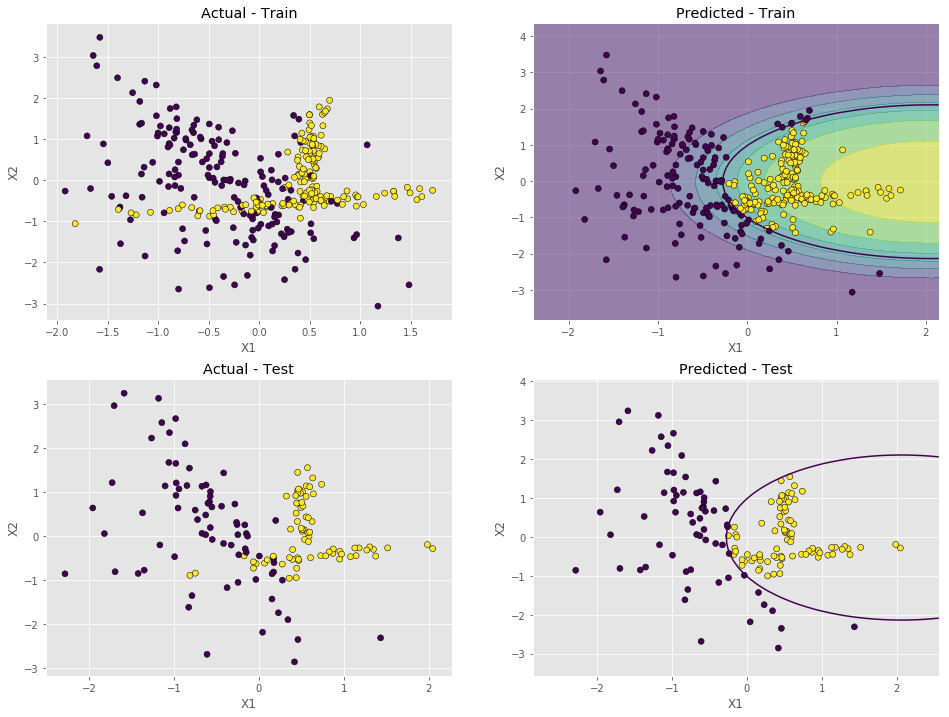

In [228]:
xx,yy,z = class_contour(X_train)
fig = plt.figure(figsize=(16,12))
ax = plt.subplot(221)
plt.scatter(x=X_train[:,0],y=X_train[:,1],c=Y_train, label='Actual',edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual - Train')
plt.subplot(222)
plt.contour(xx,yy,z,[.5])
plt.contourf(xx,yy,z,alpha=0.5)
plt.scatter(x=X_train[:,0],y=X_train[:,1], c=clf.predict(X_train),edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted - Train')

xx,yy,z = class_contour(X_test)
ax = plt.subplot(223)
plt.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_test, label='Actual',edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual - Test')
plt.subplot(224)
plt.scatter(x=X_test[:,0],y=X_test[:,1], c=clf.predict(X_test),edgecolors='black')
plt.contour(xx,yy,z,[.5],)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted - Test')


In [247]:
def find_wrong_pred(X_test, Y_test):
    '''function that returns the X matrix of mis-classified observations'''    
    Y_comp = np.matrix([Y_test,clf.predict(X_test)]).T
    wrong_array = []
    for entry in range(len(Y_test)):
        obs = np.ravel(Y_comp[entry])
        #print obs[0],obs[1]
        if obs[0] != obs[1]:
            print 'Wrong!: %i'%entry
            wrong_array.append(entry)
        else:
            continue

Wrong!: 2
Wrong!: 17
Wrong!: 22
Wrong!: 37
Wrong!: 48
Wrong!: 61
Wrong!: 66
Wrong!: 88
Wrong!: 106
Wrong!: 107
Wrong!: 108
Wrong!: 117
Wrong!: 124
Wrong!: 133
Wrong!: 137


Text(0.5,1,'test')

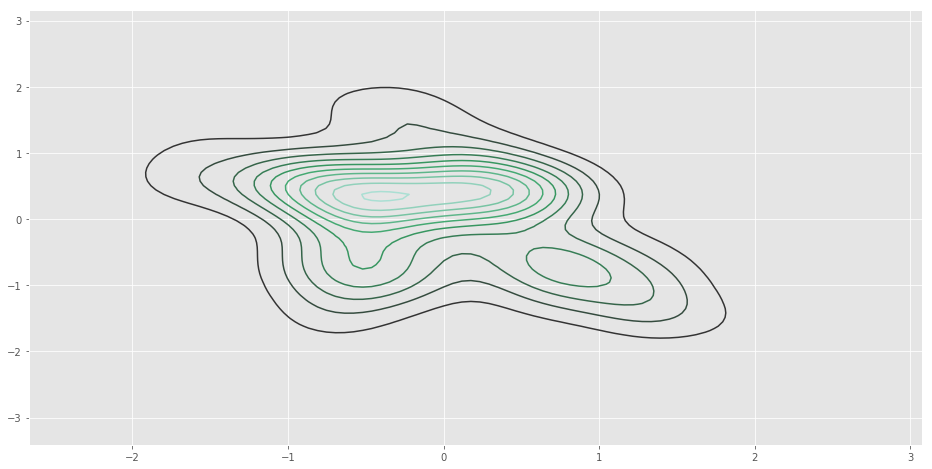

<Figure size 1152x576 with 0 Axes>

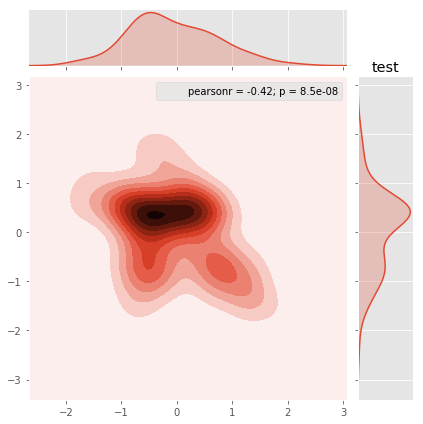

In [167]:
fig = plt.figure(figsize=(16,8))
sns.kdeplot(X_test[:,0],X_test[:,1])
fig = plt.figure(figsize=(16,8))
sns.jointplot(X_test[:,0],X_test[:,1],kind='kde')
plt.title('test')